In [1]:
# importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import os
from os import path

import matplotlib.pyplot as plt
from matplotlib import cm

import seaborn as sns
sns.set_style("whitegrid") # configuração de estilos dos gráficos do seaborn

%matplotlib inline

In [2]:
def modificar_valor_InterfModel(item):
    tmp = item.strip()
    nro = int(tmp[-1:])
    return nro

def modificar_valor_simulacao(nome_diretorio):
    posicao = nome_diretorio.rfind('_')
    posicao += 1
    return nome_diretorio[posicao:]

In [3]:
FILE = 'PRR.txt' # arquivo de interesse
colunas = ['Modelo de colisao', 'nó 1', 'nó 2', 'nó 3', 'nó 4', 'nó 5']


# obtem uma lista de todos arquivos e subdiretorios do diretorio atual
folders = os.listdir()

# print(folders,end='\n\n')

folders.sort()

DATA = pd.DataFrame()

# o método filter vai filtrar todas as entradas de acordo com a condição
# condição expressa pela função lambda,
# para cada x in folders, se x é diretório, então retorna x
# lembrando que o retorno de filter é um objeto iterável 

for folder in filter(lambda x: path.isdir(x),folders):
    os.chdir(folder)
    if path.isfile(FILE):
        simulacao = modificar_valor_simulacao(folder)
        dfPRR = pd.read_csv(FILE,delimiter='|',names=colunas)
        dfPRR['Modelo de colisao'] = dfPRR['Modelo de colisao'].apply(modificar_valor_InterfModel)
        dfPRR['simulacao'] = simulacao
        DATA = DATA.append(dfPRR,ignore_index=True)
        print('coletado dados de ->\t',folder)
    os.chdir('../')

coletado dados de ->	 simulacao_4.0.0_PA
coletado dados de ->	 simulacao_4.0.1_PB
coletado dados de ->	 simulacao_4.2.1_CLBin_0.1
coletado dados de ->	 simulacao_4.2.2_CLBin_0.2
coletado dados de ->	 simulacao_4.2.3_CLBin_0.3
coletado dados de ->	 simulacao_4.2.4_CLBin_0.4
coletado dados de ->	 simulacao_4.2.5_CLBin_0.5
coletado dados de ->	 simulacao_4.2.6_CLBin_0.6
coletado dados de ->	 simulacao_4.2.7_CLBin_0.7
coletado dados de ->	 simulacao_4.2.8_CLBin_0.8
coletado dados de ->	 simulacao_4.2.9_CLBin_0.9


In [4]:
DATA.head()

,Modelo de colisao,nó 1,nó 2,nó 3,nó 4,nó 5,simulacao
0,0,0.948,0.957,0.953,0.846,0.820,PA
1,1,0.902,0.909,0.913,0.741,0.708,PA
2,2,0.919,0.958,0.925,0.789,0.744,PA
3,0,0.794,0.916,0.701,0.730,0.547,PB
4,1,0.638,0.729,0.519,0.519,0.305,PB


In [5]:
# mostra 5 registros escolhidos ao acaso
DATA.sample(5)

,Modelo de colisao,nó 1,nó 2,nó 3,nó 4,nó 5,simulacao
9,0,0.932,0.979,0.918,0.726,0.683,0.2
29,2,0.973,0.990,0.972,0.747,0.693,0.8
30,0,0.987,0.990,0.985,0.818,0.792,0.9
12,0,0.949,0.982,0.938,0.749,0.706,0.3
13,1,0.889,0.919,0.797,0.536,0.448,0.3


In [6]:
# EXPORTAR os dados para CSV
export_file = path.join('dados_csv','PRR.csv') # diretorio + nome arquivo

DATA.to_csv(export_file,
             index=False, # não salvar o indice dos dados
             sep="|", # delimitador utilizado no arquivo, pode ser também , \t ; 
            )

In [7]:
dfPRR = DATA.melt(id_vars=['Modelo de colisao', 'simulacao'],
          value_vars=['nó 1', 'nó 2', 'nó 3', 'nó 4', 'nó 5'],
          var_name='nó sensor',
          value_name = 'PRR'
         )

In [8]:
dfPRR['PRR'] = dfPRR['PRR'] * 100

In [9]:
dfPRR.head()

,Modelo de colisao,simulacao,nó sensor,PRR
0,0,PA,nó 1,94.8
1,1,PA,nó 1,90.2
2,2,PA,nó 1,91.9
3,0,PB,nó 1,79.4
4,1,PB,nó 1,63.8


In [10]:
# EXPORTAR os dados para CSV
export_file = path.join('dados_csv','PRR_transposto.csv') # diretorio + nome arquivo

dfPRR.to_csv(export_file,
             index=False, # não salvar o indice dos dados
             sep="|", # delimitador utilizado no arquivo, pode ser também , \t ; 
            )

Text(0.5, 1.0, 'Modelo sem colisão')

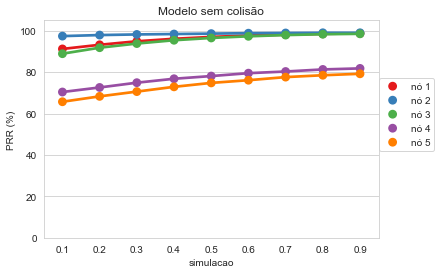

In [11]:
select = (dfPRR['simulacao'] != 'PA') & (dfPRR['simulacao'] != 'PB') & (dfPRR['Modelo de colisao'] != 2)
df = dfPRR[select & (dfPRR['Modelo de colisao'] == 0)]

axes = sns.pointplot(x='simulacao', y='PRR', hue='nó sensor', data=df,
                     palette='Set1'
                    )
axes.set(ylim=(0,105))
axes.legend(loc=(1,0.4))

axes.set_ylabel('PRR (%)')
plt.title("Modelo sem colisão")

Text(0.5, 1.0, 'Modelo com colisão')

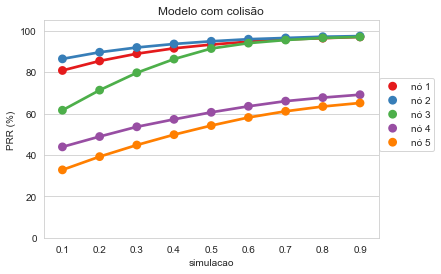

In [12]:
select = (dfPRR['simulacao'] != 'PA') & (dfPRR['simulacao'] != 'PB') & (dfPRR['Modelo de colisao'] != 2)
df = dfPRR[select & (dfPRR['Modelo de colisao'] == 1)]

axes = sns.pointplot(x='simulacao',
                     y='PRR',
                     hue='nó sensor',
                     data=df,
                     palette='Set1'
                    )
axes.set(ylim=(0,105))
axes.legend(loc=(1,0.4))

axes.set_ylabel('PRR (%)')
plt.title("Modelo com colisão")

In [13]:
# select = (dfPRR['simulacao'] != 'PA') & (dfPRR['simulacao'] != 'PB') & (dfPRR['Modelo de colisao'] != 2)
# df = dfPRR[select]


# g = sns.factorplot(x="simulacao", y="PRR", hue="node", 
#                    col="Modelo de colisao", 
#                    data=df,
#                    kind='point',
#                    col_wrap=2,
#                    join=True,
#                    palette="Set1",
#                    markers='.',
#                    size=3,
#                    aspect=1.5)
# g.set(ylim=(0,1.05))


In [14]:
# select = (dfPRR['simulacao'] != 'PA') & (dfPRR['simulacao'] != 'PB') & (dfPRR['Modelo de colisao'] != 2)  & (dfPRR['node'] != 'node 2')  & (dfPRR['node'] != 'node 4')
        
# df = dfPRR[select]


# g = sns.factorplot(x="simulacao", y="PRR", hue="node", 
#                    col="Modelo de colisao", 
#                    data=df,
#                    kind='point',
#                    col_wrap=2,
#                    join=True,
#                    palette="Set1",
#                    markers='.',
#                    size=3,
#                    aspect=1.5)
# g.set(ylim=(0,1.05))

In [15]:
# select = (dfPRR['Modelo de colisao'] != 2)
# df = dfPRR[select]


# g = sns.factorplot(x="simulacao", y="PRR", hue="node", 
#                    col="Modelo de colisao", 
#                    data=df,
#                    kind='point',
#                    col_wrap=2,
#                    join=True,
#                    palette="Set1",
#                    markers='.',
#                    size=3,
#                    aspect=1.5)
# g.set(ylim=(0,1.05))